In [2]:
import sys
!{sys.executable} -m pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [3]:
import glacierml as gl
import configparser
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_column',None)
# import sys
cols = []
for i in range(273):
    cols.append(i)
# !{sys.executable} -m pip install basemap

#### Let's look at how we compare to Farinotti et al. 2019

In [4]:
df = pd.read_pickle('final.pkl')

In [5]:
shelves = df[df['TermType'] == 5]

In [6]:
len(shelves)

169

In [8]:
# df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_A = df['Area']
E_H = np.mean(df[cols],axis = 1)
si = df['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[135.949,141.497]  * 10^3 km^3
Mid CI: 138.723 * 10^3 km^3
CI Half Width: 2.774 * 10^3 km^3


#### Okay, that is our global sum. Now lets look at our global sum when just comparing to Millan. To accomplish this, we exclude shelf supported glaciers in Antarctica 

In [9]:
# df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')

df_no_shelf = df.drop(df[
    (df['TermType'] == 5) & (df['region'] == '19')
].index)

# df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_A = df_no_shelf['Area']
E_H = np.mean(df_no_shelf[cols],axis = 1)
si = df_no_shelf['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[111.793,116.328]  * 10^3 km^3
Mid CI: 114.06 * 10^3 km^3
CI Half Width: 2.267 * 10^3 km^3


In [ ]:
140.6 - 111.399

#### Interesting, now how do we compare to Farinotti?

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df_r.pkl')
E_A = df['Area']
E_H = np.mean(df[cols],axis = 1)
si = df['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[119.584,124.116]  * 10^3 km^3
Mid CI: 121.85 * 10^3 km^3
CI Half Width: 2.266 * 10^3 km^3


In [ ]:
df['TermType'].unique()

Text(0.5, 0, 'Glacier Terminations')

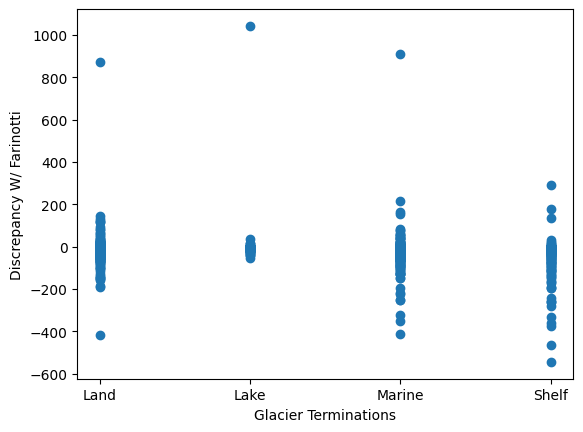

In [3]:
df['TermType'][df['TermType'] == 0] = 'Land'
df['TermType'][df['TermType'] == 1] = 'Marine'
df['TermType'][df['TermType'] == 2] = 'Lake'
df['TermType'][df['TermType'] == 5] = 'Shelf'

df['Form'][df['Form'] == 0] = 'Glacier'
df['Form'][df['Form'] == 1] = 'Ice Cap'
plt.scatter(df['TermType'],df['r'])
plt.ylabel('Discrepancy W/ Farinotti')
plt.xlabel('Glacier Terminations')


In [ ]:
df['Status'].unique()

In [ ]:
df['Status'][df['Status'] == 0] = 'Glacier or Ice Cap'
df['Status'][df['Status'] == 2] = 'Nominal Glacier'
plt.scatter(df['Status'],df['r'])
plt.ylabel('Discrepancy W/ Farinotti')
plt.xlabel('Glacier Classification')


In [ ]:
df['Form'][df['Form'] == 0] = 'Glacier'
df['Form'][df['Form'] == 1] = 'Ice Cap'
plt.scatter(df['Form'],df['r'])
plt.ylabel('Discrepancy W/ Farinotti')
plt.xlabel('Glacier Classification')


In [ ]:
df['TermType'][df['TermType'] == 0] = 'Land'
df['TermType'][df['TermType'] == 1] = 'Marine'
df['TermType'][df['TermType'] == 2] = 'Lake'
df['TermType'][df['TermType'] == 5] = 'Shelf'
plt.scatter(df['TermType'],df['r'])
plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
plt.xlabel('Glacier Terminations')
plt.show()

In [ ]:
for region in df['region'].sort_values().unique():
    dft = df[df['region'] == region]
    plt.scatter(dft['TermType'],dft['r'])
    plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
    plt.xlabel('Glacier Termination')
    plt.title(f'RGI Region {region}')
    plt.show()

In [ ]:
dft = df[df['region'] == '09']
dft['TermType'][dft['TermType'] == 0] = 'Land'
dft['TermType'][dft['TermType'] == 1] = 'Marine'
dft['TermType'][dft['TermType'] == 2] = 'Lake'
dft['TermType'][dft['TermType'] == 5] = 'Shelf'
plt.scatter(dft['TermType'],dft['r'])
plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
plt.xlabel('Glacier Terminations')
plt.title('Russian Arctic Glaciers')
plt.show()

land_mean = np.round(np.mean(dft['r'][dft['TermType'] == 'Land']),3)
land_var = np.round(np.var(dft['r'][dft['TermType'] == 'Land']),3)
print(f'mean discrepancy of land terminating glaciers: {land_mean}\n'
      f'var of discrepancy: {land_var}\n')

lake_mean = np.round(np.mean(dft['r'][dft['TermType'] == 'Marine']),3)
lake_var = np.round(np.var(dft['r'][dft['TermType'] == 'Marine']),3)
print(f'mean discrepancy of marine terminating glaciers: {lake_mean}\n'
      f'var of discrepancy: {lake_var}\n')

shelf_mean = np.round(np.mean(dft['r'][dft['TermType'] == 'Shelf']),3)
shelf_var = np.round(np.var(dft['r'][dft['TermType'] == 'Shelf']),3)
print(f'mean discrepancy of shelf terminating glaciers: {shelf_mean}\n'
      f'var of discrepancy: {shelf_var}\n')

In [ ]:
dft = df[df['region'] == '09']
dft['Form'][dft['Form'] == 0] = 'Glacier'
dft['Form'][dft['Form'] == 1] = 'Ice Cap'
plt.scatter(dft['Form'],dft['r'])
plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
plt.xlabel('Glacier Terminations')
plt.title('Russian Arctic Glaciers')
plt.show()

land_mean = np.round(np.mean(dft['r'][dft['Form'] == 'Glacier']),3)
land_var = np.round(np.var(dft['r'][dft['Form'] == 'Glacier']),3)
print(f'mean discrepancy of glaciers: {land_mean}\n'
      f'var of discrepancy: {land_var}\n')

lake_mean = np.round(np.mean(dft['r'][dft['Form'] == 'Ice Cap']),3)
lake_var = np.round(np.var(dft['r'][dft['Form'] == 'Ice Cap']),3)
print(f'mean discrepancy of ice caps: {lake_mean}\n'
      f'var of discrepancy: {lake_var}\n')


In [ ]:
dft = df[df['region'] == '09']
dfg = dft[dft['Form'] == 'Glacier']
dfc = dft[dft['Form'] == 'Ice Cap']

plt.scatter(dfg['TermType'],dfg['r'],label = 'Glacier',alpha = 0.5)
plt.scatter(dfc['TermType'],dfc['r'],label = 'Ice Cap',alpha = 0.5)
plt.legend(loc = 'lower right')
plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
plt.xlabel('Glacier Terminations')
plt.title('Russian Arctic Glaciers')

In [ ]:
glacier_values.min()

In [ ]:
glacier_values

In [ ]:
df

In [5]:
dfg = df[df['Form'] == 'Glacier']
dfc = df[df['Form'] == 'Ice Cap']

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
termination_categories1 = dfg['TermType']
termination_categories2 = dfc['TermType']
glacier_values = dfg['r']  # Values for glaciers for each termination
ice_cap_values = dfc['r']  # Values for ice caps for each termination

# Scatter plot positions for better visualization
position_offset = 0.2

# Plotting glaciers
plt.scatter(
    np.arange(len(termination_categories1)) - position_offset / 2, 
    glacier_values, color='blue', label='Glacier', marker='o',
#     zorder=2
)

# Plotting ice caps
plt.scatter(
    np.arange(len(termination_categories2)) + position_offset / 2, 
    ice_cap_values, color='orange', label='Ice Cap', marker='o', 
#     zorder=2
)

# Customizing x-axis ticks
plt.xticks(range(len(termination_categories1)), termination_categories1)
plt.xlabel('Termination')

# Labels and legend
plt.ylabel('Discrepancy W/ Farinotti')
plt.title('Discrepancy of Glaciers and Ice Caps by Termination')
plt.legend()

# Adding minor ticks between major ticks
minor_ticks = np.arange(-0.5, len(termination_categories1) - 0.5, 1)
plt.gca().xaxis.set_minor_locator(plt.FixedLocator(minor_ticks))

# Adjusting x-axis limits for better visualization
plt.xlim(-0.5, len(termination_categories1) - 0.5)

# Show plot
plt.grid(True, which='both', linestyle='--', alpha=0.7, zorder=1)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f2b79709f70> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f2b71d1aee0> (for post_execute):



KeyboardInterrupt



#### We lost $13.806 \times 10^3 \text{km}^3$ of ice when comparing to Farinotti, $\approx 10\%$ decrease
#### Our uncertainty also decreased by $\approx 7\%$ from 2.445 to 2.266 $\times 10^3 \text{km}^3$ of ice
#### How do the discrepancies between this study and Farinotti stack up?


In [ ]:
#### TOTAL DIFFERENCE IN GLOBAL VOLUMES ####
t = (
    np.sum(np.mean(df[cols],axis = 1) * df['Area']) - np.sum(df['FMT'] / 1e3 * df['Area'])
) / 1e3
print(t)

#### We are looking fo $\approx 28 \times 10^3 \text{km}^3$

In [ ]:
running_sum = np.cumsum(
    df['r'].sort_values(ascending = False).reset_index().drop('index',axis = 1)
)
running_sum.index = range(1, len(running_sum) + 1)

plt.plot(running_sum)
plt.minorticks_on()
plt.grid(which = 'both')
plt.xlabel('Glacier Index')
plt.ylabel('Difference of Volume')
plt.title('Cumulative Sum Difference of Volumes')

#### Okay, so we have a handful of large positive and large negative discrepancies. 
#### What do they look like close up?

In [ ]:
running_sum1 = np.cumsum(
    df['r'].sort_values(ascending = False).reset_index().drop('index',axis = 1)
)
running_sum1.index = range(1, len(running_sum1) + 1)

plt.plot(running_sum1[0:100])
plt.minorticks_on()
plt.grid(which = 'both')
# plt.xscale('log')
plt.xlabel('Glacier Index')
plt.ylabel('Difference of Volume (km$^3$)')
plt.title('Cumulative Sum Difference of Volumes')
plt.show()

In [ ]:
running_sum2 = np.cumsum(
    df['r'].sort_values(ascending = True).reset_index().drop('index',axis = 1)
)
running_sum2.index = range(1, len(running_sum2) + 1)
# plt.plot(running_sum1[0:500],label = 'Positive Differences')

plt.plot(running_sum2[0:500],label = 'Negative Differences')
plt.minorticks_on()
plt.grid(which = 'both')
# plt.xscale('log')
# plt.legend()
plt.xlabel('Glacier Index')
plt.ylabel('Difference of Volume (km$^3$)')
plt.title('Cumulative Sum Difference of Volumes')

In [ ]:
running_sum2 = np.cumsum(
    df['r'].sort_values(ascending = True).reset_index().drop('index',axis = 1)
)
running_sum2.index = range(1, len(running_sum2) + 1)
plt.plot(running_sum1[0:500],label = 'Positive Differences')

plt.plot(running_sum2[0:500],label = 'Negative Differences')
plt.minorticks_on()
# plt.grid(which = 'both')
# plt.xscale('log')
plt.legend()
plt.xlabel('Glacier Index')
plt.ylabel('Difference of Volume (km$^3$)')
plt.title('Cumulative Sum Difference of Volumes')

#### What percentage of the global glacier volume discrepancy can be accounted for with these glaciers?

In [ ]:
df1 = df.sort_values('r', ascending=True)
df2 = df.sort_values('r', ascending=True)

In [ ]:
counts = []
percs = []
n = 0
for i in tqdm(range(10,540,10)):
#     print(i)
    n =+ i
#     print(n*2)

    percent_of_df = np.round((n*2) / len(df) * 100,4)
#     print(f'Percent of global glaciers considered = {percent_of_df}')

    neg = (np.sum(df1['r'].head(n)) / 1e3)
#     print(neg)

    pos = (np.sum(df2['r'].tail(n)) / 1e3)
    d = abs(pos + neg) / (-t) * 100
    percs.append(d)
    counts.append(percent_of_df)
#     print(f'Volume Difference contained = {d}')
#     print('')

In [ ]:
plt.plot(counts,percs)
plt.xlabel('Percent of RGI')
plt.ylabel('Percent of Global Volume Discrepancy')
plt.minorticks_on()
plt.grid(which = 'both')

In [ ]:
RGI = gl.load_RGI()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

ax1 = axes[0]
m1 = Basemap(projection='cyl', ax=ax1, resolution='c')
m1.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')

m1.scatter(df1['CenLon'].head(500), df1['CenLat'].head(500), c='red', alpha=1, label='Largest Negative Differences')
m1.drawcoastlines()
ax1.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

ax2 = axes[1]
m2 = Basemap(projection='cyl', ax=ax2, resolution='c')
m2.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')

m2.scatter(df2['CenLon'].tail(500), df2['CenLat'].tail(500), c='orange', alpha=1, label='Largest Positive Differences')
m2.drawcoastlines()
ax2.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

plt.show()

In [ ]:
neg_100 = df1.head(100)
pos_100 = df1.tail(100)

In [ ]:
g = gl.coregister_data('4')

g = g.drop(g[g['RGIId'].duplicated(keep = False)].index)
g = g.sample(frac = 1,random_state = 0)
g = g.reset_index().drop('index', axis = 1)
g['region'] = g['RGIId'].str[6:8]

In [ ]:
for i in neg_100['region'].sort_values().unique():
    negs = neg_100[neg_100['region'] == i]
    category_to_count = i
    n = (neg_100['region'] == category_to_count).sum()
    
    category_to_count2 = 5
    m = (negs['TermType'] == category_to_count2).sum()
    
    category_to_count2 = 1
    l = (negs['Form'] == category_to_count2).sum()
    
    search_list = np.ndarray.tolist(negs['RGIId'].values)
    pattern = '|'.join(search_list)
    gs = g[g['RGIId'].str.contains(pattern)]
    o = g['RGIId'].str.contains(pattern).sum()   
    print(
        f'RGI Region {i} has {n} / 500 most negative discrepant glaciers,\n'
        f'{m} of which are shelf supported,\n'
        f'{l} of which are ice caps,\n'
        f'{o} of which are in training data.'
    )
    if o != 0:
        
    
        category_to_count3 = 5
        category_to_count4 = 1
        p = (gs['TermType'] == category_to_count3).sum()
        q = (gs['Form'] == category_to_count4).sum()   
        print(
            f'Of the glaciers contained in training data, '
            f'{p} are shelf supported and {q} are ice caps'
        )
        problem_train_glacs = gs['Name'].values
        problem_train_glacs_id = gs['RGIId'].values
        print(f'These glaciers are {problem_train_glacs}')
        print(f'RGIId: {problem_train_glacs_id}')
    print('')

In [ ]:
g

In [ ]:
plt.scatter(g['Area'],g['Area']*(g['Thickness']/1e3))
plt.xscale('log')
plt.yscale('log')

In [ ]:
sum(df['r'][df['TermType'] == 5]) / 1e3

In [ ]:
len(g[g['TermType'] == 1])

In [ ]:
dfr0 = (df[(df['TermType'] == 1) & (df['Form'] == 1)])
dfr1 = (df[(df['TermType'] == 5) & (df['Form'] == 1)])

In [ ]:
dfr0 = (df[
    (df['TermType'] == 1) & 
#     (df['Form'] == 0) & 
    (df['region'] == '07')
])
dfr0 = (df[
    (df['TermType'] == 5) & 
#     (df['Form'] == 0) & 
    (df['region'] == '07')
])


In [ ]:
# plt.scatter(dfr0['Area'],-dfr0['r'])
plt.scatter(dfr0['Area'],dfr0['r'])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(dfr1['Area'],-dfr1['r'])

plt.scatter(dfr1['Area'],dfr1['r'])
plt.xscale('log')
plt.yscale('log')

In [ ]:
dfr1

In [ ]:
(df['r'][(df['TermType'] == 1) & (df['region'] == '05')])

In [ ]:
(df['r'][(df['TermType'] == 0) & (df['region'] == '05')])

In [ ]:
for i in pos_100['region'].sort_values().unique():
    poss = pos_100[pos_100['region'] == i]
    category_to_count = i
    n = (pos_100['region'] == category_to_count).sum()
    
    category_to_count2 = 5
    m = (poss['TermType'] == category_to_count2).sum()
    
    category_to_count2 = 1
    l = (poss['Form'] == category_to_count2).sum()
    
    search_list = np.ndarray.tolist(poss['RGIId'].values)
    pattern = '|'.join(search_list)
    gs = g[g['RGIId'].str.contains(pattern)]
    o = g['RGIId'].str.contains(pattern).sum()   
    print(
        f'RGI Region {i} has {n} / 500 most positive discrepant glaciers,\n'
        f'{m} of which are shelf supported,\n'
        f'{l} of which are ice caps,\n'
        f'{o} of which are in training data.'
    )
    if o != 0:
        
    
        category_to_count3 = 5
        category_to_count4 = 1
        p = (gs['TermType'] == category_to_count3).sum()
        q = (gs['Form'] == category_to_count4).sum()   
        print(
            f'Of the glaciers contained in training data, '
            f'{p} are shelf supported and {q} are ice caps'
        )
        problem_train_glacs = gs['Name'].values
        problem_train_glacs_id = gs['RGIId'].values
        print(f'These glaciers are {problem_train_glacs}')
        print(f'RGIId: {problem_train_glacs_id}')
    print('')

In [ ]:
barnes = df[df['RGIId'] == 'RGI60-04.06187']
windy = df[df['RGIId'] == 'RGI60-09.00807']

In [ ]:
windy

In [ ]:
df1.head(100)[df1['region'] == '03'][['CenLat','CenLon','Name']]

In [ ]:
df1.head(100)[df1['region'] == '04'][['CenLat','CenLon','Name']]

In [ ]:
df1.head(100)[df1['region'] == '05'][['CenLat','CenLon','Name']]

In [ ]:
df1.head(100)[df1['region'] == '06'][['CenLat','CenLon','Name']]

In [ ]:
df1.head(100)[df1['region'] == '07'][['CenLat','CenLon','Name']]

In [ ]:
(df1.head(100)[df1['region'] == '09'][['CenLat','CenLon','Name']])

In [ ]:
antarctic_discrepant_index = df1.head(100)[df1['region'] == '19'][['CenLat','CenLon','Name']].index

In [ ]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
df = df.drop(antarctic_discrepant_index)

In [ ]:
# df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_A = df['Area']
E_H = np.mean(df[cols],axis = 1)
si = df['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

In [ ]:
gf = g[g['Form'] == 1]

In [ ]:
g

In [ ]:
plt.scatter(g['Area'],g['Thickness'])

In [ ]:
RGI = gl.load_RGI()

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

# ax1 = axes[0]
m1 = Basemap(projection='cyl', ax=ax, resolution='c')
m1.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')
m1.scatter(g['CenLon'], g['CenLat'], c='red', alpha=0.5, label='RGI Outline')

m1.scatter(gf['CenLon'], gf['CenLat'], c='orange', alpha=1, label='Largest Negative Differences')
m1.drawcoastlines()
ax1.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

# ax2 = axes[1]
# m2 = Basemap(projection='cyl', ax=ax2, resolution='c')
# m2.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')

# m2.scatter(df2['CenLon'].tail(500), df2['CenLat'].tail(500), c='orange', alpha=1, label='Largest Positive Differences')
# m2.drawcoastlines()
# ax2.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

plt.show()

In [ ]:
df['Status'].unique()

In [ ]:
g['Form'].unique()

In [ ]:
len(df[df['Form'] == 0])

In [ ]:
len(df[df['Form'] == 0]) / len(df) * 100

In [ ]:
len(df[df['Form'] == 1]) / len(df) * 100

In [ ]:
len(g[g['Form'] == 0]) / len(g) * 100

In [ ]:
len(g[g['Form'] == 1]) / len(g) * 100

In [ ]:
len(g[(g['Form'] == 1) & (g['region'] == '19')]) / len(g) * 100

In [ ]:
gf.sort_values('RGIId')

In [ ]:
RGI

In [ ]:
RGI['region'][RGI['TermType'] == 5].unique()

In [ ]:
g[g['TermType'] == 5]

In [ ]:
g[(g['Form'] == 1) & (g['region'] == '04')]

In [ ]:
g[(g['Form'] == 1) & (g['region'] == '07')]

In [ ]:
g[(g['Form'] == 1) & (g['region'] == '09')]

In [ ]:
g[(g['Form'] == 1) & (g['region'] == '17')]

In [ ]:
g[(g['Form'] == 1) & (g['region'] == '19')]

In [ ]:
g[g['Form'] == 1]['Area'].sum()

In [ ]:
RGI[RGI['Form'] == 1]['Area'].sum()

In [ ]:
g[g['TermType'] == 5]

In [ ]:
(RGI[RGI['TermType'] == 5])

In [ ]:
RGI = gl.load_RGI()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

ax1 = axes[0]
m1 = Basemap(projection='cyl', ax=ax1, resolution='c')
m1.scatter(
    (RGI[RGI['TermType'] == 5])['CenLon'], (RGI[RGI['TermType'] == 5])['CenLat'], 
    c='blue', alpha=1,
    label='RGI Shelf Terminating Glaciers'
)

# m1.scatter(df1['CenLon'].head(500), df1['CenLat'].head(500), c='red', alpha=1, label='Largest Negative Differences')
m1.drawcoastlines()
ax1.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

ax2 = axes[1]
m2 = Basemap(projection='cyl', ax=ax2, resolution='c')
m2.scatter(
    df1['CenLon'].head(100), df1['CenLat'].head(100), 
    c='red', alpha=1, 
    label='100 Largest Negative Differences'
)

# m2.scatter(df2['CenLon'].tail(500), df2['CenLat'].tail(500), c='orange', alpha=1, label='Largest Positive Differences')
m2.drawcoastlines()
ax2.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

plt.show()

In [ ]:
RGI = gl.load_RGI()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

ax1 = axes[0]
m1 = Basemap(projection='cyl', ax=ax1, resolution='c')
m1.scatter(
    (RGI[RGI['Form'] == 1])['CenLon'], (RGI[RGI['Form'] == 1])['CenLat'], 
    c='blue', alpha=1,
    label='RGI Ice Caps'
)

# m1.scatter(df1['CenLon'].head(500), df1['CenLat'].head(500), c='red', alpha=1, label='Largest Negative Differences')
m1.drawcoastlines()
ax1.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

ax2 = axes[1]
m2 = Basemap(projection='cyl', ax=ax2, resolution='c')
m2.scatter(
    df1['CenLon'].head(500), df1['CenLat'].head(500), 
    c='red', alpha=1, 
    label='100 Largest Negative Differences'
)

# m2.scatter(df2['CenLon'].tail(500), df2['CenLat'].tail(500), c='orange', alpha=1, label='Largest Positive Differences')
m2.drawcoastlines()
ax2.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

plt.show()